# I-94 traffic analysis
## Determing indicators of heavy traffic

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

traffic_volume = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print(traffic_volume.head(5))
print(traffic_volume.tail(5))
print('\n')
traffic_volume.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

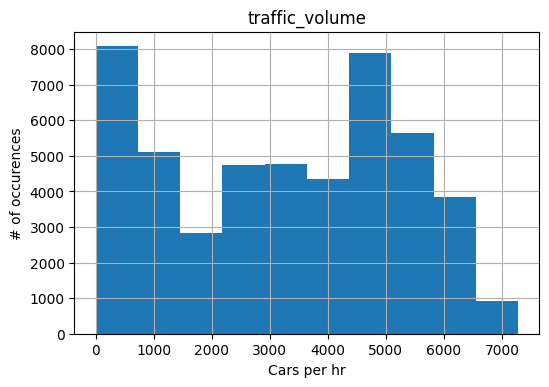

In [50]:
traffic_volume.hist(column='traffic_volume')
plt.xlabel('Cars per hr')
plt.ylabel('# of occurences')
plt.show()

In [51]:
traffic_volume['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- **25% of the time there were 1193 cars or less passing the station per hour** 
- **25% of the time there were 4933 cars or more passng the station per hour**
- **Differences possibly night/day traffic pattern?**

In [52]:
traffic_volume['date_time'] = pd.to_datetime(traffic_volume['date_time'])
traffic_volume['date_time'].describe()

count                   48204
unique                  40575
top       2013-04-18 22:00:00
freq                        6
first     2012-10-02 09:00:00
last      2018-09-30 23:00:00
Name: date_time, dtype: object

In [53]:
hourly_traffic_volume = traffic_volume['date_time'].dt.hour
print(hourly_traffic_volume)

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64


In [54]:
daytime_traffic = traffic_volume[(traffic_volume['date_time'].dt.hour >= 7) & (traffic_volume['date_time'].dt.hour < 19)].copy()
nighttime_traffic = traffic_volume[(traffic_volume['date_time'].dt.hour >= 19) | (traffic_volume['date_time'].dt.hour < 7)].copy()

daytime_traffic.info()
print('\n')
print(daytime_traffic.head(5))
print('\n')
print(daytime_traffic.tail(5))
print('\n')
print('unique values:', sorted(daytime_traffic['date_time'].dt.hour.unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       

- **As we can see above our unique values for daytime_traffic is 0700 <= hours < 1900, which is what we were targeting**

In [55]:
nighttime_traffic.info()
print('\n')
print(nighttime_traffic.head(5))
print('\n')
print(nighttime_traffic.tail(5))
print('\n')
print('unique values:', sorted(nighttime_traffic['date_time'].dt.hour.unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1   

- **Our nighttime_traffic unique values are 1900 <= hours < 0700, which is what we were targeting. We can also see that the number of entries for daytime_traffic(23877) and nighttime_traffic(24327) equals the number of entries in our original traffic_volume['date_time'], 48204.**

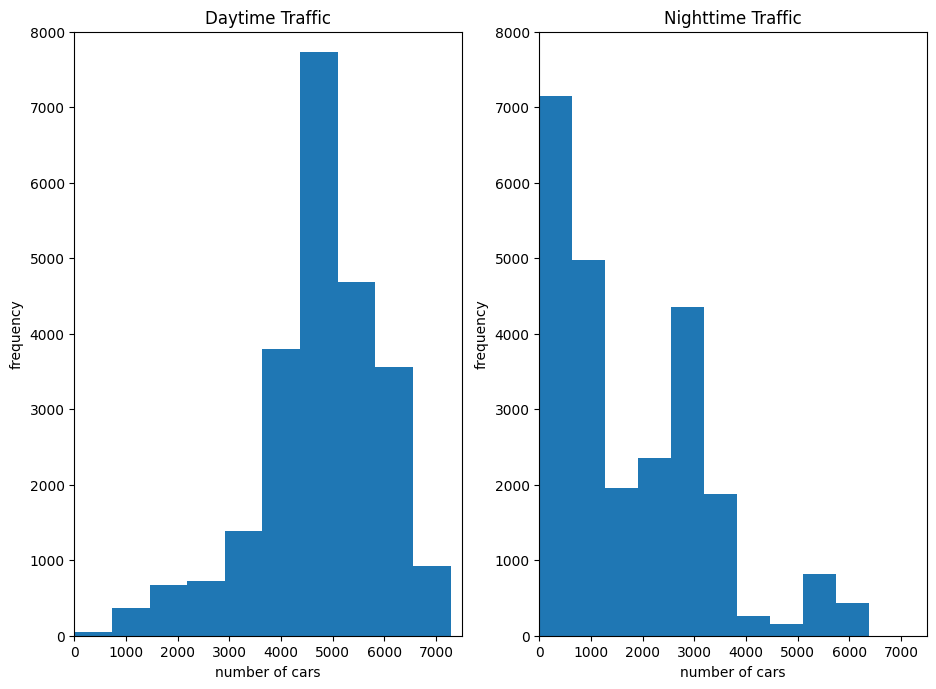

In [56]:
plt.figure(figsize=(11, 8))

plt.subplot(1, 2, 1)
plt.hist(daytime_traffic['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.xlabel('number of cars')
plt.ylabel('frequency')
plt.title('Daytime Traffic')

plt.subplot(1, 2, 2)
plt.hist(nighttime_traffic['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.xlabel('number of cars')
plt.ylabel('frequency')
plt.title('Nighttime Traffic')
plt.show()

- **The daytime data is skewed to the left, while the nighttime data is skewed to the right**
- **The nighttime data shows relatively light traffic with a mean of 1785 cars per hour, as compared to daytime_traffic with a mean of 4762 cars per hour. Since we are focusing on indicators of heavy traffic nighttime_traffic will be excluded from further analysis**

In [57]:
daytime_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [58]:
nighttime_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [59]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

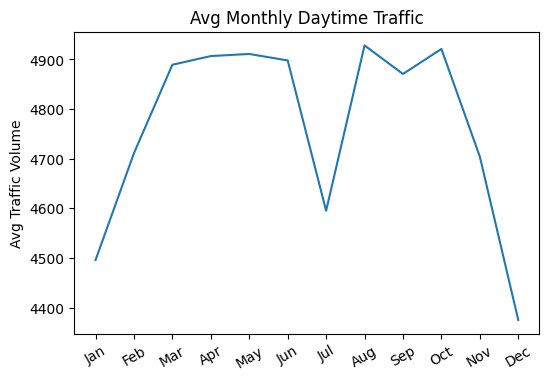

In [60]:
plt.plot(by_month['traffic_volume'])
plt.title('Avg Monthly Daytime Traffic')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                                       'Sep', 'Oct', 'Nov', 'Dec'], rotation=30)
plt.ylabel('Avg Traffic Volume')
plt.show()

- **Traffic tends to decrease in the winter months (Nov, Dec, Jan) but there is also a sharp decline between Jun-Jul, why?**

In [61]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

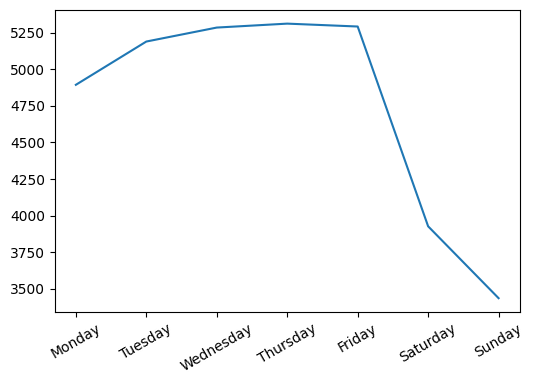

In [62]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
          rotation=30)
plt.show()

- **There looks to be a dramatic drop off of daily average traffic volume on Saturday and Sunday**

In [63]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
business_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


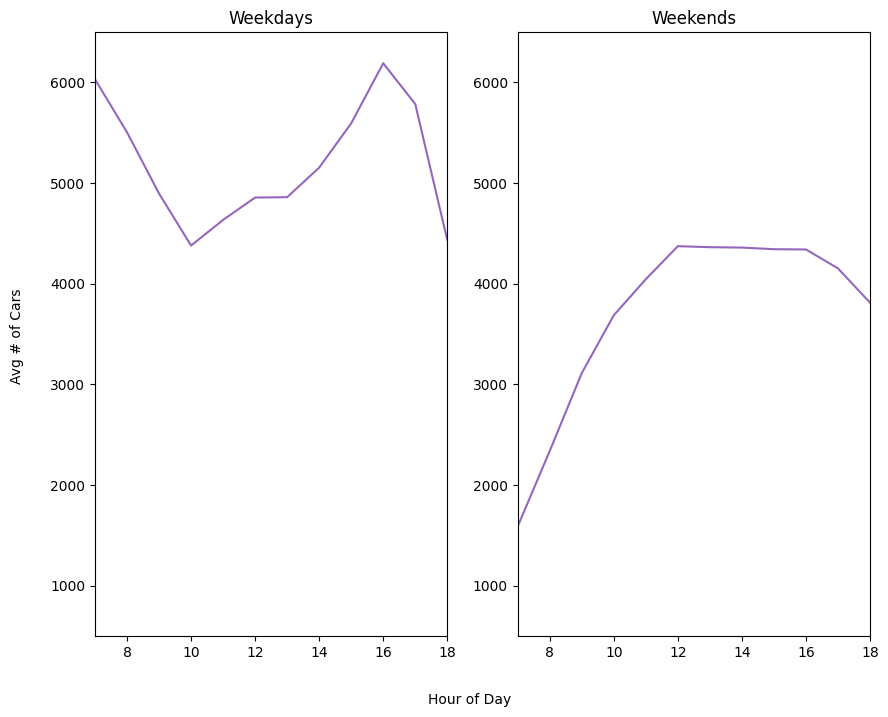

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 8))

fig.text(0.5, 0.04, 'Hour of Day', ha='center')
fig.text(0.04, 0.5, 'Avg # of Cars', va='center', rotation='vertical')

plt.subplot(1, 2, 1)
plt.plot(by_hour_business)
plt.title('Weekdays')
plt.xlim(7, 18)
plt.ylim(500, 6500)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend)
plt.title('Weekends')
plt.xlim(7, 18)
plt.ylim(500, 6500)

plt.show()

- **The Weekdays are busiest in the early mornings and late afternoons, while the weekends are steadily busy from the late morning through the early evening**

In [65]:
def tv_corr(var):
    correlation = daytime_traffic['traffic_volume'].corr(daytime_traffic[var])
    print(var, ': ', correlation )

In [66]:
tv_corr('temp')
tv_corr('rain_1h')
tv_corr('snow_1h')
tv_corr('clouds_all')

temp :  0.12831656852303905
rain_1h :  0.0036965098350734324
snow_1h :  0.001265349847175986
clouds_all :  -0.03293234866163948


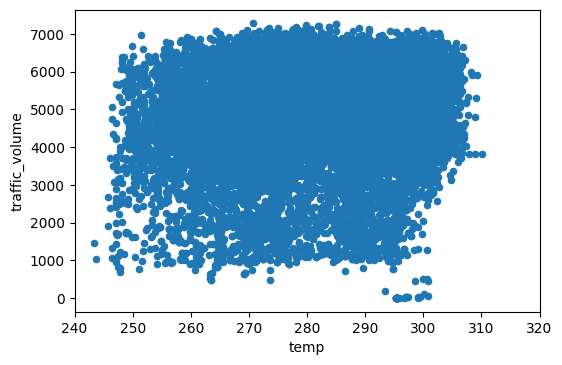

In [67]:
daytime_traffic.plot.scatter(x='temp', y='traffic_volume')
plt.xlim(240, 320)
plt.show()

- **Although there is a .128 correlation between daytime traffic volume and temp it is hard to distinguish that from this scatter plot, which would make it a weak correlation and not a reliable predictor of heavy traffic**

- **None of our weather information would make a reliable indicator for heavy traffic**

In [68]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_description = daytime_traffic.groupby('weather_description').mean()

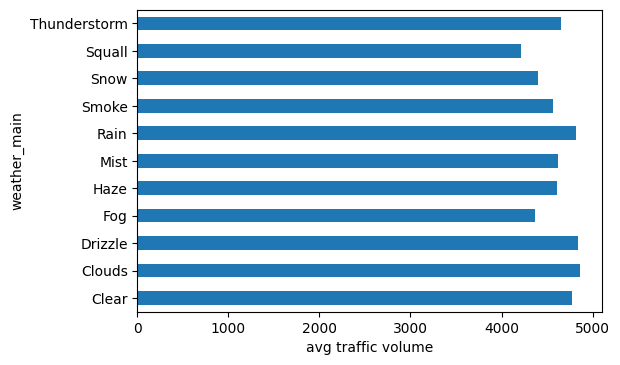

In [69]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('avg traffic volume')
plt.show()

- **This graph doesn't show much difference between the different weather_main categories**

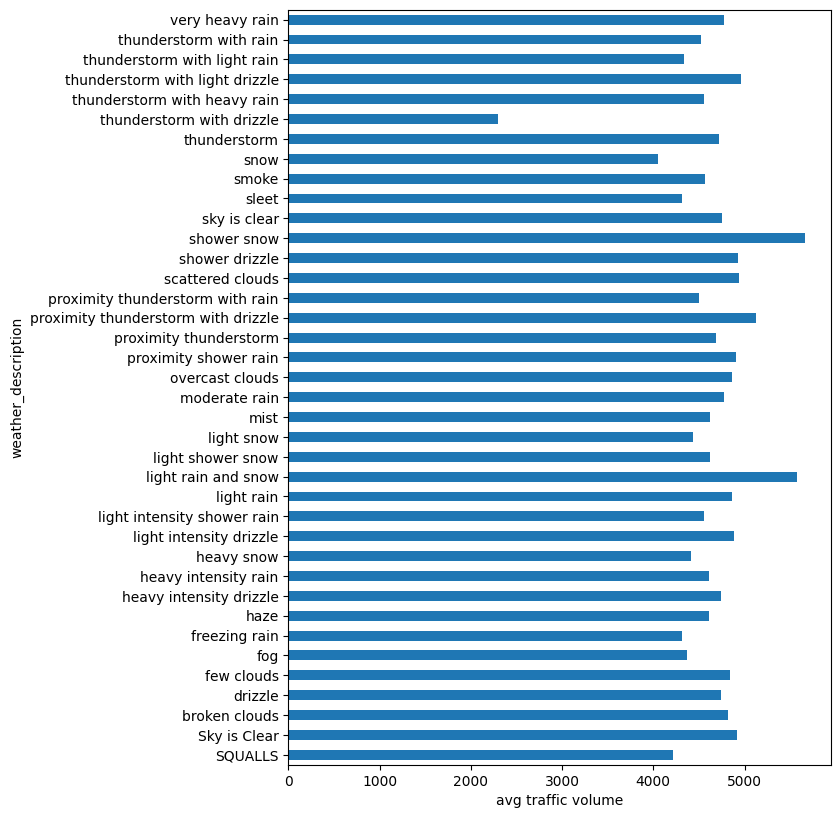

In [70]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7, 10))
plt.xlabel('avg traffic volume')
plt.show()

- **This bar plot shows that two categories(shower snow and light rain and snow) have avg traffic volumes above 5,000. These categories could possibly be used as indicators of heavy traffic**